# "Let's cut to the chase"
## Voici un petit exercice de collecte, exploration, analyse de données.

On utilisera le jeu de données "Stations Vélo'v de la Métropole de Lyon - disponibilité temps réel"

https://data.grandlyon.com/jeux-de-donnees/stations-velo-v-metropole-lyon-disponibilite-temps-reel/donnees

### Collecte

L'URL suivante permet d'effectuer une requête WFS, restituant un document de type GeoJSON dans le système de projection EPSG:2154, http://epsg.io/2154

In [52]:
url = "https://download.data.grandlyon.com/wfs/rdata?SERVICE=WFS&VERSION=2.0.0&request=GetFeature&typename=jcd_jcdecaux.jcdvelov&outputFormat=application/json;%20subtype=geojson&SRSNAME=EPSG:2154&count=500&startIndex=1"

In [53]:
import requests

proxies = {
    'http': 'http://proxyhttp1pro:8080',
    'https': 'http://proxyhttp1pro:8080'
}

s = requests.Session()

In [54]:
s.proxies = proxies
s.proxies = None

In [55]:
response = s.get(url)

In [56]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [57]:
response.status_code

200

In [58]:
assert response.status_code == 200

In [59]:
response.headers

{'Date': 'Mon, 09 Mar 2020 22:31:13 GMT', 'Server': 'Apache', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'Origin, X-Requested-With, Content-Type, Accept, Authorization', 'Access-Control-Allow-Methods': 'GET,POST,OPTIONS,DELETE,PUT', 'Content-Type': 'application/json; subtype=geojson', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Connection': 'close', 'Transfer-Encoding': 'chunked'}

In [60]:
response.text

'{\n"type": "FeatureCollection",\n"name": "jcd_jcdecaux.jcdvelov",\n"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::2154" } },\n"features": [\n{ "type": "Feature", "properties": { "number": "4008", "name": "Clos Savaron", "address": "10 Rue Clos Savaron", "address2": "Face au n°19", "commune": "Lyon 4 ème", "nmarrond": "", "bonus": "", "pole": "deleuvre", "lat": "45.7826362574796000", "lng": "4.8255591851847730", "bike_stands": "20", "status": "OPEN", "available_bike_stands": "15", "available_bikes": "5", "availabilitycode": "1", "availability": "Vert", "banking": "false", "gid": "1211", "last_update": "2020-03-09 23:22:49", "last_update_fme": "2020-03-09 23:31:00", "code_insee": "69384", "langue": "", "etat": "", "nature": "", "titre": "", "description": "", "startdate": "", "enddate": "" }, "geometry": { "type": "Point", "coordinates": [ 841830.834847709396854, 6521975.112768361344934 ] } },\n{ "type": "Feature", "properties": { "number": "7031", "name": "Jaur

In [61]:
type(response.text)

str

Par contre :

In [62]:
type(response.json())

dict

qui est énormement plus pratique !

In [63]:
data = response.json()

### Exploration

In [64]:
data.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [65]:
data['name']

'jcd_jcdecaux.jcdvelov'

In [66]:
data['type']

'FeatureCollection'

In [67]:
data['crs']

{'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::2154'}}

In [68]:
#data['features']

In [69]:
data['features'][0]

{'type': 'Feature',
 'properties': {'number': '4008',
  'name': 'Clos Savaron',
  'address': '10 Rue Clos Savaron',
  'address2': 'Face au n°19',
  'commune': 'Lyon 4 ème',
  'nmarrond': '',
  'bonus': '',
  'pole': 'deleuvre',
  'lat': '45.7826362574796000',
  'lng': '4.8255591851847730',
  'bike_stands': '20',
  'status': 'OPEN',
  'available_bike_stands': '15',
  'available_bikes': '5',
  'availabilitycode': '1',
  'availability': 'Vert',
  'banking': 'false',
  'gid': '1211',
  'last_update': '2020-03-09 23:22:49',
  'last_update_fme': '2020-03-09 23:31:00',
  'code_insee': '69384',
  'langue': '',
  'etat': '',
  'nature': '',
  'titre': '',
  'description': '',
  'startdate': '',
  'enddate': ''},
 'geometry': {'type': 'Point',
  'coordinates': [841830.8348477094, 6521975.112768361]}}

In [70]:
data['features'][0].keys()

dict_keys(['type', 'properties', 'geometry'])

In [71]:
data['features'][0]['properties']

{'number': '4008',
 'name': 'Clos Savaron',
 'address': '10 Rue Clos Savaron',
 'address2': 'Face au n°19',
 'commune': 'Lyon 4 ème',
 'nmarrond': '',
 'bonus': '',
 'pole': 'deleuvre',
 'lat': '45.7826362574796000',
 'lng': '4.8255591851847730',
 'bike_stands': '20',
 'status': 'OPEN',
 'available_bike_stands': '15',
 'available_bikes': '5',
 'availabilitycode': '1',
 'availability': 'Vert',
 'banking': 'false',
 'gid': '1211',
 'last_update': '2020-03-09 23:22:49',
 'last_update_fme': '2020-03-09 23:31:00',
 'code_insee': '69384',
 'langue': '',
 'etat': '',
 'nature': '',
 'titre': '',
 'description': '',
 'startdate': '',
 'enddate': ''}

N.B. : l'attribut `number` porte l'identifiant unique "métiers" de chaque station Vélo'V

### Analyse

#### Quelle station a le plus de Vélo'V disponibles ?

#### 1. Approche bête et mechante 

In [96]:
# initialisation
max_available_bikes = -1

for feature in data['features']:
    
    this_station_available_bikes = feature['properties']['available_bikes']
    
    if this_station_available_bikes == '':
        continue
    
    this_station                 = feature['properties']
    
    if int(this_station_available_bikes) > max_available_bikes:
        
        max_available_bikes = int(this_station_available_bikes)
        most_available_station = this_station

In [97]:
print("""La station qui actuellement a le plus de Vélo'V disponibles est la station numéro %s ; 
%i Vélo'V sont disponibles.""" % (most_available_station['number'], max_available_bikes))

La station qui actuellement a le plus de Vélo'V disponibles est la station numéro 7003 ; 
40 Vélo'V sont disponibles.


...et pour en savoir plus sur cette station ?

In [98]:
most_available_station

{'number': '7003',
 'name': 'Gambetta / Garibaldi',
 'address': '100, Cours Gambetta',
 'address2': 'Prolongement Rue Rachais',
 'commune': 'Lyon 7 ème',
 'nmarrond': '3',
 'bonus': '',
 'pole': 'métro D',
 'lat': '45.7517901355474700',
 'lng': '4.8526079660087520',
 'bike_stands': '40',
 'status': 'OPEN',
 'available_bike_stands': '0',
 'available_bikes': '40',
 'availabilitycode': '2',
 'availability': 'Bleu',
 'banking': 'true',
 'gid': '1058',
 'last_update': '2020-03-09 23:26:37',
 'last_update_fme': '2020-03-09 23:31:00',
 'code_insee': '69387',
 'langue': '',
 'etat': '',
 'nature': '',
 'titre': '',
 'description': '',
 'startdate': '',
 'enddate': ''}

### 2. Une approche plus "pythonique"

In [100]:
tmp = [ el for el in data['features'] if el['properties']['available_bikes'] != '' ]

In [103]:
tmp.sort(key=lambda x: int(x['properties']['available_bikes']), reverse=True)

In [104]:
tmp[0]

{'type': 'Feature',
 'properties': {'number': '7003',
  'name': 'Gambetta / Garibaldi',
  'address': '100, Cours Gambetta',
  'address2': 'Prolongement Rue Rachais',
  'commune': 'Lyon 7 ème',
  'nmarrond': '3',
  'bonus': '',
  'pole': 'métro D',
  'lat': '45.7517901355474700',
  'lng': '4.8526079660087520',
  'bike_stands': '40',
  'status': 'OPEN',
  'available_bike_stands': '0',
  'available_bikes': '40',
  'availabilitycode': '2',
  'availability': 'Bleu',
  'banking': 'true',
  'gid': '1058',
  'last_update': '2020-03-09 23:26:37',
  'last_update_fme': '2020-03-09 23:31:00',
  'code_insee': '69387',
  'langue': '',
  'etat': '',
  'nature': '',
  'titre': '',
  'description': '',
  'startdate': '',
  'enddate': ''},
 'geometry': {'type': 'Point',
  'coordinates': [844012.2793672716, 6518599.513596931]}}

### 3. Avec `pandas`

In [105]:
import pandas as pd
pd.set_option('display.max_rows', 100)    # <- cela permet d'afficher jusqu'à 100 lignes d'un DataFrame
pd.set_option('display.max_columns', 100) # <- cela permet d'afficher jusqu'à 100 colonnes d'un DataFrame

In [106]:
df0 = pd.DataFrame.from_records(data['features'])

In [107]:
df0.head()

type                                         properties  \
0  Feature  {'number': '4008', 'name': 'Clos Savaron', 'ad...   
1  Feature  {'number': '7031', 'name': 'Jaurès / Gerland',...   
2  Feature  {'number': '9050', 'name': 'Allée de l'Europe'...   
3  Feature  {'number': '2020', 'name': 'Musée des Confluen...   
4  Feature  {'number': '17003', 'name': 'St Fons - Théatre...   

                                            geometry  
0  {'type': 'Point', 'coordinates': [841830.83484...  
1  {'type': 'Point', 'coordinates': [843087.26440...  
2  {'type': 'Point', 'coordinates': [839417.65241...  
3  {'type': 'Point', 'coordinates': [841441.31470...  
4  {'type': 'Point', 'coordinates': [844713.53957...

On constate que la donnée qui peut nous intéresser se trouve dans les colonnes `properties` et `geometry`. On construit un autre DataFrame à partir de la colonne `properties` :

In [120]:
df1 = pd.DataFrame.from_records( df0['properties'])

In [121]:
df1.head()

number                   name                address  \
0   4008           Clos Savaron    10 Rue Clos Savaron   
1   7031       Jaurès / Gerland     45, Rue de Gerland   
2   9050      Allée de l'Europe  228 avenue du Plateau   
3   2020  Musée des Confluences     Pont Raymond Barre   
4  17003      St Fons - Théatre    Face, 47 Rue Carnot   

                          address2     commune nmarrond bonus  \
0                     Face au n°19  Lyon 4 ème                  
1                                   Lyon 7 ème       31         
2                                   Lyon 9 ème       50         
3  Parvis du Musée des Confluences  Lyon 2 ème       20         
4                                   SAINT-FONS                  

                                     pole                  lat  \
0                                deleuvre  45.7826362574796000   
1     Complexe sportif Benjamin Delessert  45.7398132348896800   
2  Commerces, poste, mairie, cpam, marché  45.7836371650547900   
3                   Musée des Confluences  45.7333083359277900   
4                              Saint-Fons  45.7079860163389800   

                  lng bike_stands status available_bike_stands  \
0  4.8255591851847730          20   OPEN                    15   
1  4.8403073886228570          20   OPEN                     8   
2  4.7945253084995630          12   OPEN                     6   
3  4.8189203135366740          20   OPEN                    16   
4  4.8601564934850360          18   OPEN                    10   

  available_bikes availabilitycode availability banking   gid  \
0               5                1         Vert   false  1211   
1              12                1         Vert   false   998   
2               6                1         Vert   false  1016   
3               4                1         Vert    true  1107   
4               8                1         Vert   false  1258   

           last_update      last_update_fme code_insee langue etat nature  \
0  2020-03-09 23:22:49  2020-03-09 23:31:00      69384                      
1  2020-03-09 23:27:56  2020-03-09 23:31:00      69387                      
2  2020-03-09 23:27:23  2020-03-09 23:31:00      69389                      
3  2020-03-09 23:25:00  2020-03-09 23:31:00      69382                      
4  2020-03-09 23:24:33  2020-03-09 23:31:00      69199                      

  titre description startdate enddate  
0                                      
1                                      
2                                      
3                                      
4

On extrait la géometrie,

In [122]:
geometry_df = pd.DataFrame.from_records(df0['geometry'])

et on crée deux colonnes dans df1, x et y, à partir de cette dernière :

In [123]:
df1['x'] = geometry_df.coordinates.apply( lambda row: row[0] )
df1['y'] = geometry_df.coordinates.apply( lambda row: row[1] )

In [124]:
df1.head()

number                   name                address  \
0   4008           Clos Savaron    10 Rue Clos Savaron   
1   7031       Jaurès / Gerland     45, Rue de Gerland   
2   9050      Allée de l'Europe  228 avenue du Plateau   
3   2020  Musée des Confluences     Pont Raymond Barre   
4  17003      St Fons - Théatre    Face, 47 Rue Carnot   

                          address2     commune nmarrond bonus  \
0                     Face au n°19  Lyon 4 ème                  
1                                   Lyon 7 ème       31         
2                                   Lyon 9 ème       50         
3  Parvis du Musée des Confluences  Lyon 2 ème       20         
4                                   SAINT-FONS                  

                                     pole                  lat  \
0                                deleuvre  45.7826362574796000   
1     Complexe sportif Benjamin Delessert  45.7398132348896800   
2  Commerces, poste, mairie, cpam, marché  45.7836371650547900   
3                   Musée des Confluences  45.7333083359277900   
4                              Saint-Fons  45.7079860163389800   

                  lng bike_stands status available_bike_stands  \
0  4.8255591851847730          20   OPEN                    15   
1  4.8403073886228570          20   OPEN                     8   
2  4.7945253084995630          12   OPEN                     6   
3  4.8189203135366740          20   OPEN                    16   
4  4.8601564934850360          18   OPEN                    10   

  available_bikes availabilitycode availability banking   gid  \
0               5                1         Vert   false  1211   
1              12                1         Vert   false   998   
2               6                1         Vert   false  1016   
3               4                1         Vert    true  1107   
4               8                1         Vert   false  1258   

           last_update      last_update_fme code_insee langue etat nature  \
0  2020-03-09 23:22:49  2020-03-09 23:31:00      69384                      
1  2020-03-09 23:27:56  2020-03-09 23:31:00      69387                      
2  2020-03-09 23:27:23  2020-03-09 23:31:00      69389                      
3  2020-03-09 23:25:00  2020-03-09 23:31:00      69382                      
4  2020-03-09 23:24:33  2020-03-09 23:31:00      69199                      

  titre description startdate enddate              x             y  
0                                      841830.834848  6.521975e+06  
1                                      843087.264407  6.517247e+06  
2                                      839417.652413  6.522031e+06  
3                                      841441.314703  6.516487e+06  
4                                      844713.539572  6.513750e+06

In [125]:
df1.dtypes

number                    object
name                      object
address                   object
address2                  object
commune                   object
nmarrond                  object
bonus                     object
pole                      object
lat                       object
lng                       object
bike_stands               object
status                    object
available_bike_stands     object
available_bikes           object
availabilitycode          object
availability              object
banking                   object
gid                       object
last_update               object
last_update_fme           object
code_insee                object
langue                    object
etat                      object
nature                    object
titre                     object
description               object
startdate                 object
enddate                   object
x                        float64
y                        float64
dtype: obj

In [126]:
df1.describe()

x             y
count     420.000000  4.200000e+02
mean   843857.818414  6.519492e+06
std      2330.255582  2.435300e+03
min    838207.661683  6.512503e+06
25%    842169.032103  6.518160e+06
50%    843763.839884  6.519499e+06
75%    845502.791147  6.520818e+06
max    851972.846296  6.532432e+06

In [137]:
max_available_bikes = df1['available_bikes'].replace('', '-1').astype('int').max()

40

In [138]:
df1[ df1['available_bikes'] == f"{max_available_bikes}" ]

number                  name              address  \
337   7003  Gambetta / Garibaldi  100, Cours Gambetta   

                     address2     commune nmarrond bonus     pole  \
337  Prolongement Rue Rachais  Lyon 7 ème        3        métro D   

                     lat                 lng bike_stands status  \
337  45.7517901355474700  4.8526079660087520          40   OPEN   

    available_bike_stands available_bikes availabilitycode availability  \
337                     0              40                2         Bleu   

    banking   gid          last_update      last_update_fme code_insee langue  \
337    true  1058  2020-03-09 23:26:37  2020-03-09 23:31:00      69387          

    etat nature titre description startdate enddate              x  \
337                                                  844012.279367   

                y  
337  6.518600e+06

In [147]:
df1['num_available_bikes'] = df1['available_bikes'].replace('', '-1').astype('int')

cf. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

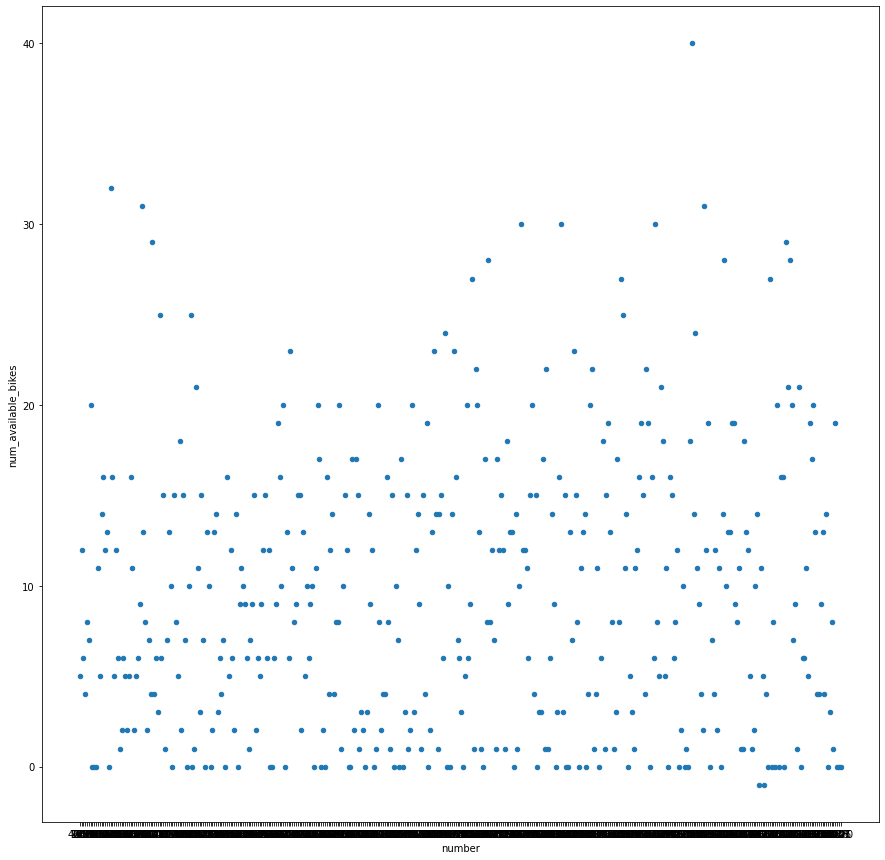

In [149]:
%matplotlib inline
df1.plot(x='number', y='num_available_bikes', kind='scatter', figsize=(15,15))

In [150]:
df1.sort_values(by=['num_available_bikes'], ascending=False).head(3)

number                   name                   address  \
337   7003   Gambetta / Garibaldi       100, Cours Gambetta   
17    3029  Place Aristide Briand  Face 303, Rue Duguesclin   
34    5004             Saint-Jean            Rue Saint-Jean   

                                      address2     commune nmarrond bonus  \
337                   Prolongement Rue Rachais  Lyon 7 ème        3         
17                              Angle Gambetta  Lyon 3 ème       29         
34   entre entrée de la Cathédrale et le métro  Lyon 5 ème        4         

                                        pole                  lat  \
337                                  métro D  45.7517901355474700   
17                     itinéraires cyclables  45.7530043530221000   
34   funiculaire, coeur quartier, Vieux Lyon  45.7604837438977800   

                    lng bike_stands status available_bike_stands  \
337  4.8526079660087520          40   OPEN                     0   
17   4.8502474272199690          38   OPEN                     6   
34   4.8265650503972600          39   OPEN                     7   

    available_bikes availabilitycode availability banking   gid  \
337              40                2         Bleu    true  1058   
17               32                1         Vert    true   881   
34               31                1         Vert    true   854   

             last_update      last_update_fme code_insee langue etat nature  \
337  2020-03-09 23:26:37  2020-03-09 23:31:00      69387                      
17   2020-03-09 23:27:36  2020-03-09 23:31:00      69383                      
34   2020-03-09 23:26:02  2020-03-09 23:31:00      69385                      

    titre description startdate enddate              x             y  \
337                                      844012.279367  6.518600e+06   
17                                       843825.657469  6.518730e+06   
34                                       841965.869361  6.519518e+06   

     num_available_bikes  
337                   40  
17                    32  
34                    31

### Cela donne envie de mener d'autres investigations, n'est-ce pas ?!

#### Combien de stations Vélo'V par commune ?

In [151]:
df1.groupby(['commune'])['number'].count()

commune
                              8
ALBIGNY-SUR-SAONE             1
BRON                          4
CALUIRE-ET-CUIRE              4
COLLONGES-AU-MONT-D'OR        1
COUZON-AU-MONT-D'OR           1
ECULLY                        1
FONTAINES-SUR-SAONE           2
LA MULATIERE                  1
Lyon 1 er                    20
Lyon 2 ème                   33
Lyon 3 ème                   56
Lyon 4 ème                   20
Lyon 5 ème                   25
Lyon 6 ème                   32
Lyon 7 ème                   45
Lyon 8 ème                   38
Lyon 9 ème                   26
NEUVILLE-SUR-SAONE            2
OULLINS                       3
PIERRE-BENITE                 1
RILLIEUX-LA-PAPE              2
SAINT-CYR-AU-MONT-D'OR        1
SAINT-DIDIER-AU-MONT-D'OR     1
SAINT-FONS                    3
SAINT-GENIS-LAVAL             1
SAINT-PRIEST                  2
SAINTE-FOY-LES-LYON           1
TASSIN-LA-DEMI-LUNE           1
VAULX-EN-VELIN                4
VENISSIEUX                    4


In [152]:
df1[ df1['commune'] == 'VAULX-EN-VELIN' ]

number                         name                     address  \
92   12002  Vaulx - Poudrette / La Soie  Face 2 rue de la Poudrette   
162  12001              Vaulx - La Soie         Rue de la Poudrette   
239  12003         Vaulx - Bibliothèque            Rue Joseph Blein   
268  12004       Vaulx - Hôtel de ville           Rue Maurice Audin   

                   address2         commune nmarrond bonus  \
92                           VAULX-EN-VELIN       70         
162                          VAULX-EN-VELIN        1         
239  devant la bibliothèque  VAULX-EN-VELIN                  
268                          VAULX-EN-VELIN                  

                                pole                  lat                 lng  \
92   Centre commercial Carré de Soie  45.7644003130587800  4.9192757859473670   
162       Pôle multimodal de la Soie  45.7608131946829250  4.9206039456886055   
239                                   45.7570697600648660  4.9273216112656590   
268                                   45.7782973092579700  4.9207001064103110   

    bike_stands  status available_bike_stands available_bikes  \
92           20    OPEN                    14               6   
162          25    OPEN                    25               0   
239          15    OPEN                    14               0   
268          30  CLOSED                     0               0   

    availabilitycode availability banking   gid          last_update  \
92                 1         Vert   false  1004  2020-03-09 23:24:24   
162                3       Orange    true   986  2020-03-09 23:30:48   
239                3       Orange   false  1242  2020-03-09 23:23:25   
268                0         Gris   false  1243  2020-03-09 23:29:14   

         last_update_fme code_insee langue etat nature titre description  \
92   2020-03-09 23:31:00      69256                                        
162  2020-03-09 23:31:00      69256                                        
239  2020-03-09 23:31:00      69256                                        
268  2020-03-09 23:31:00      69256                                        

    startdate enddate              x             y  num_available_bikes  
92                     849159.657927  6.520123e+06                    6  
162                    849272.545855  6.519728e+06                    0  
239                    849804.696246  6.519325e+06                    0  
268                    849232.794316  6.521669e+06                    0

#### Et la station Vélo'V la plus proche de nous ?

N.B. :
208b, rue Garibaldi $\longrightarrow$ lng, lat = 4.8522681,45.7585214 ; X, Y = 843968.3, 6519346.2

In [153]:
X0 = 843968.3
Y0 = 6519346.2

In [154]:
import math

def Euclidean_distance(a, b):
    """
    a, b sont des tuples ~ (X, Y)
    """
    
    return math.sqrt( (a[0]-b[0])**2 +  (a[1]-b[1])**2 )

In [155]:
Euclidean_distance( (0,0), (1,1) )

1.4142135623730951

In [156]:
df1['distance_from_here'] = df1.apply( lambda row: Euclidean_distance( (row.x, row.y), (X0, Y0)), axis=1 )

In [157]:
df1['distance_from_here'].head()

0    3388.205959
1    2276.157554
2    5283.594082
3    3816.028955
4    5645.438804
Name: distance_from_here, dtype: float64

In [158]:
data['features'].sort(key=lambda x: x['properties']['available_bikes'], reverse=True)

In [159]:
df1.sort_values('distance_from_here').head()

number                   name              address  \
163   3058           Place du Lac         Place du Lac   
361   3037  Paul Bert / Garibaldi   209, Rue Paul Bert   
8     3015   Servient / Garibaldi             Servient   
235   3084                 Desaix    128 rue Paul Bert   
98    3004      Bourse du travail  Rue de la Part-Dieu   

                                    address2     commune nmarrond bonus  \
163                          face à la Poste  Lyon 3 ème       58         
361  Face place des Martyrs de la Résistance  Lyon 3 ème       37         
8                        Angle rue Garibaldi  Lyon 3 ème       15         
235                                           Lyon 3 ème       84         
98                       face Place Voltaire  Lyon 3 ème        4         

                             pole                  lat                 lng  \
163                                45.7588856223001300  4.8537678938544730   
361  maillage (piscine Garibaldi)  45.7571028581681740  4.8534807971166600   
8       tram, cité administrative  45.7607758409992000  4.8526939571425470   
235                                45.7572612599251600  4.8552008564228180   
98        métro B, coeur quartier  45.7596382324954700  4.8480846921356076   

    bike_stands status available_bike_stands available_bikes availabilitycode  \
163          19   OPEN                    18               1                1   
361          20   OPEN                    11               9                1   
8            17   OPEN                    17               0                3   
235          28   OPEN                    10              18                1   
98           20   OPEN                    14               6                1   

    availability banking   gid          last_update      last_update_fme  \
163         Vert   false  1045  2020-03-09 23:22:38  2020-03-09 23:31:00   
361         Vert    true   859  2020-03-09 23:29:56  2020-03-09 23:31:00   
8         Orange   false   804  2020-03-09 23:22:41  2020-03-09 23:31:00   
235         Vert   false   776  2020-03-09 23:30:31  2020-03-09 23:31:00   
98          Vert    true   855  2020-03-09 23:30:47  2020-03-09 23:31:00   

    code_insee langue     etat nature  \
163      69383                          
361      69383                          
8        69383                          
235      69383     FR  CLOSING  WORKS   
98       69383                          

                                                 titre  \
163                                                      
361                                                      
8                                                        
235  Fermeture de la station  3038 - VIVIER MERLE /...   
98                                                       

                                           description            startdate  \
163                                                                           
361                                                                           
8                                                                             
235  En raison de travaux sur le boulevard Marius V...  2019-10-01 00:00:00   
98                                                                            

                 enddate              x             y  num_available_bikes  \
163                       844083.932775  6.519389e+06                    1   
361                       844066.268993  6.519191e+06                    9   
8                         843995.551801  6.519597e+06                    0   
235  2020-04-30 00:00:00  844199.526915  6.519212e+06                   18   
98                        843640.331316  6.519463e+06                    6   

     distance_from_here  
163          123.429354  
361          183.597414  
8            252.540732  
235          267.524302  
98           348.003165